# LAB 5 - RANDOM FOREST AND BOOSTING

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
ctr = pd.read_csv("CTR.csv")
ctr.info()
ctr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CTR            6057 non-null   float64
 1   titleWords     6057 non-null   int64  
 2   adWords        6057 non-null   int64  
 3   depth          6057 non-null   int64  
 4   position       6057 non-null   int64  
 5   advCTR         6057 non-null   float64
 6   advCTRInPos    6057 non-null   float64
 7   queryCTR       6057 non-null   float64
 8   queryCTRInPos  6057 non-null   float64
 9   gender         6057 non-null   object 
 10  age            6057 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 520.6+ KB


,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender,age
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,male,0-12
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,male,25-30
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,female,13-18
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,female,25-30
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,female,0-12


In [49]:
from sklearn.model_selection import train_test_split

y = ctr['CTR']
X = pd.get_dummies(ctr.drop(['CTR'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((4239, 18), (1818, 18))

## Regression Tree with Cross-validation

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 21)}

dt = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
mod = GridSearchCV(dt, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5, verbose=1)
mod.fit(X_train, y_train)

mod.best_estimator_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    4.4s finished


DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

In [6]:
def OSR2_calculation(y_test, y_pred):
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)    
    return  1 - SSE/SST

print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))

OSR2: 0.4062


In [7]:
from sklearn.metrics import mean_squared_error

print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

MSE: 0.00321


## Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor
import time

mod = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=2)
mod.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.9s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [9]:
print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


OSR2: 0.56419
MSE: 0.00235


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


## Random Forest Regressor with Cross-validation

In [36]:
## Fix max_depth
grid_values = {'max_features': np.linspace(1,8,5, dtype='int32'), # should go till 18 for bagging
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestRegressor() 
mod = GridSearchCV(rf, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)
mod.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 76.96 s


In [37]:
print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

OSR2: 0.56401
MSE: 0.00235


## Feature Importance

In [38]:
pd.DataFrame({'Feature' : X_train.columns, 'Importance %': 100*mod.best_estimator_.feature_importances_})

,Feature,Importance %
0,titleWords,3.614763
1,adWords,3.229145
2,depth,1.866104
3,position,1.509689
4,advCTR,22.496367
5,advCTRInPos,35.347117
6,queryCTR,9.336378
7,queryCTRInPos,19.096282
8,gender_female,0.573476
9,gender_male,0.441953


<BarContainer object of 18 artists>

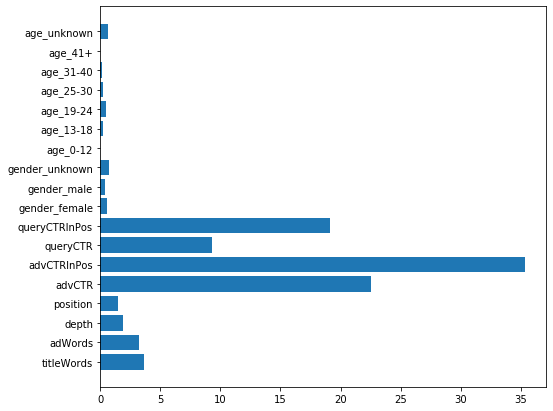

In [39]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*mod.best_estimator_.feature_importances_)

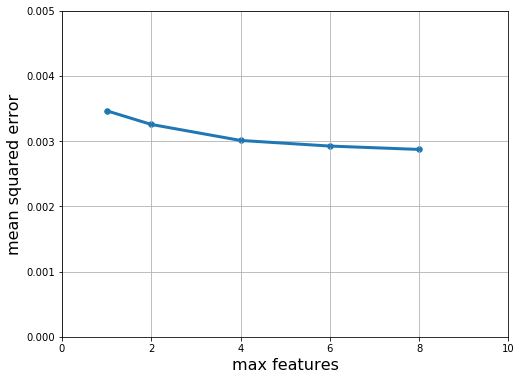

In [40]:
max_features = mod.cv_results_['param_max_features'].data
mse_scores = mod.cv_results_['mean_test_score']*(-1) # sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
plt.scatter(max_features, mse_scores, s=30)
plt.plot(max_features, mse_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 10])
plt.ylim([0, 0.0075])
plt.show()

In [15]:
# Manual hyperparamters tuning with loops
# for i in max_features
# RandomForestRegress(i)
# print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))

# plot OSR2 vs max_features

## ------------------------------------------------

## Gradient Boosting Regressor

In [16]:
# # NOTE: we need to specify number of trees to get a prediction for boosting
# pred.boost <- predict(mod.boost, newdata = test.ctr, n.trees=1000)
# # https://stats.stackexchange.com/questions/316816/ntree-parameter-in-predict-gbm
# # after you have trained a model, you can get the predictions for all earlier iterations as well, for example:

# pred.boost.earlier <- predict(mod.boost, newdata = test.ctr, n.trees=330)

In [17]:
# ntrees is the number of iterations (number of trees to fit)
# shrinkage is shrinkage parameter aka learning rate aka step-size
# interaction.depth is the depth of each individual tree

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

mod = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.001, random_state=88, verbose=1,
                                max_depth=2) #, max_leaf_nodes=3)
mod.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0060            8.29s
         2           0.0060            6.60s
         3           0.0060            6.79s
         4           0.0060            6.49s
         5           0.0060            6.92s
         6           0.0060            6.51s
         7           0.0060            6.30s
         8           0.0060            6.18s
         9           0.0060            6.37s
        10           0.0060            6.22s
        20           0.0059            5.10s
        30           0.0059            4.58s
        40           0.0058            4.30s
        50           0.0058            4.15s
        60           0.0058            4.12s
        70           0.0057            3.99s
        80           0.0057            3.90s
        90           0.0056            3.80s
       100           0.0056            3.72s
       200           0.0053            3.27s
       300           0.0050            3.08s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=2, n_estimators=1000,
                          random_state=88, verbose=1)

In [52]:
print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

OSR2: 0.3765
MSE: 0.00337


## Gradient Boosting Regressor with Cross-validation

### CV V1

In [53]:
grid_values = {'max_depth': [8],
               'max_leaf_nodes': np.linspace(2, 20, 4, dtype='int32'),
               'n_estimators': [1000],
               # 'min_samples_leaf': [10],
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
mod = GridSearchCV(gbr, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)
mod.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

time: 120.59 s
OSR2: 0.46169
MSE: 0.00291


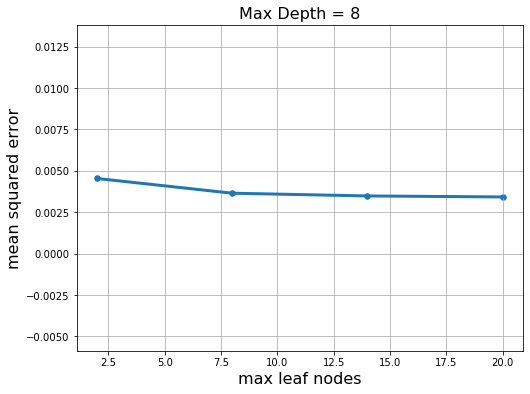

In [61]:
max_leaf_nodes = mod.cv_results_['param_max_leaf_nodes'].data
mse_scores = mod.cv_results_['mean_test_score']*(-1) # sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme

plt.figure(figsize=(8, 6))
plt.xlabel('max leaf nodes', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
plt.scatter(max_leaf_nodes, mse_scores, s=30)
plt.plot(max_leaf_nodes, mse_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 22])
plt.ylim([0, 0.0075])
plt.title('Max Depth = 8', fontsize=16)
plt.show()

### CV V2

In [63]:
grid_values = {'max_depth': np.linspace(1, 8, 4, dtype='int32'),
               'max_leaf_nodes': [3],
               'n_estimators': [1000],
               # 'min_samples_leaf': [10],
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
mod = GridSearchCV(gbr, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)
mod.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

time: 83.01 s
OSR2: 0.34771
MSE: 0.00352


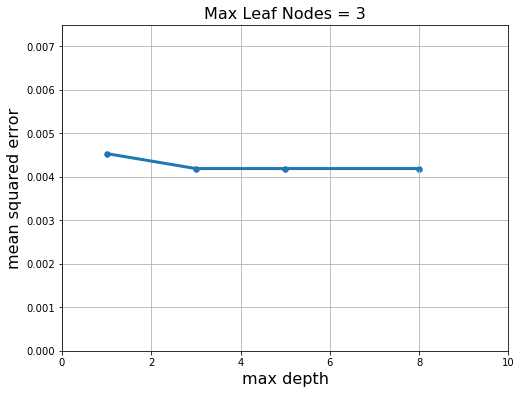

In [65]:
max_depth = mod.cv_results_['param_max_depth'].data
mse_scores = mod.cv_results_['mean_test_score']*(-1) # sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme

plt.figure(figsize=(8, 6))
plt.xlabel('max depth', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
plt.scatter(max_depth, mse_scores, s=30)
plt.plot(max_depth, mse_scores, linewidth=3)
plt.title('Max Leaf Nodes = 3', fontsize=16)
plt.xlim([0, 10])
plt.ylim([0, 0.0075])
plt.grid(True, which='both')
plt.show()

### CV V3

In [66]:
grid_values = {'max_depth': np.linspace(1, 10, 6, dtype='int32'),
               'n_estimators': np.linspace(500, 37500, 5, dtype='int32'),
               'min_samples_leaf': [10],
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
mod = GridSearchCV(gbr, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)
mod.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

In [ ]:
print('OSR2:', round(OSR2_calculation(y_test, mod.predict(X_test)), 5))
print('MSE:', round(mean_squared_error(y_test, mod.predict(X_test)), 5))

In [ ]:
pd.DataFrame({'Feature' : X_train.columns, 'Importance %': 100*mod.feature_importances_})

In [ ]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*mod.feature_importances_)

In [ ]:
max_depth = mod.cv_results_['param_max_depth'].data
n_estimators = mod.cv_results_['param_n_estimators'].data
mse_scores = mod.cv_results_['mean_test_score']*(-1) # sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme

plt.figure(figsize=(8, 6))
plt.xlabel('max depth', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
for i in max_depth:
    plt.scatter(max_features, mse_scores, s=30)
    plt.plot(max_features, mse_scores, linewidth=3)
    plt.grid(True, which='both')
plt.show()

In [ ]:
# # linear model for baseline 
# mod.lm <- lm(CTR ~ ., data = train.ctr)
# pred.mod.lm <- predict(mod.lm, newdata = test.ctr)

In [18]:
# # final comparisons
# print("Linear Regression OSR2:")
# OSR2(pred.mod.lm, test.ctr$CTR, train.ctr$CTR)
# print("CART OSR2:")
# OSR2(pred.best.cart, test.ctr$CTR, train.ctr$CTR)
# print("Random Forests OSR2:")
# OSR2(pred.best.rf, test.ctr$CTR, train.ctr$CTR)
# print("Boosting OSR2:")
# OSR2(pred.best.boost, test.ctr$CTR, train.ctr$CTR)

# print("Linear Regression Out-of-sample MAE:")
# sum(abs(test.ctr$CTR - pred.mod.lm))/nrow(test.ctr.mm)
# print("CART Out-of-sample MAE:")
# sum(abs(test.ctr$CTR - pred.best.cart))/nrow(test.ctr.mm)
# print("Random Forests Out-of-sample MAE:")
# sum(abs(test.ctr$CTR - pred.best.rf))/nrow(test.ctr.mm)
# print("Boosting Out-of-sample MAE:")
# sum(abs(test.ctr$CTR - pred.best.boost))/nrow(test.ctr.mm)

# # for boosting/rf let's look at MAE restricted to CTR above and below 10%
# test.ctr.above <- filter(test.ctr, CTR > .1)
# test.ctr.below <- filter(test.ctr, CTR <= .1)
# test.ctr.above.mm = as.data.frame(model.matrix(CTR ~ . + 0, data=test.ctr.above))
# test.ctr.below.mm = as.data.frame(model.matrix(CTR ~ . + 0, data=test.ctr.below))

# nrow(test.ctr.below)
# nrow(test.ctr.above)

# pred.boost.above <- predict(best.boost, newdata = test.ctr.above.mm, n.trees = 11500)
# pred.boost.below <- predict(best.boost, newdata = test.ctr.below.mm, n.trees = 11500)

# pred.rf.above <- predict(best.rf, newdata = test.ctr.above.mm)
# pred.rf.below <- predict(best.rf, newdata = test.ctr.below.mm)

# print("Boosting Out-of-sample MAE for CTR above 10%:")
# sum(abs(test.ctr.above$CTR - pred.boost.above))/nrow(test.ctr.above)
# print("Boosting Out-of-sample MAE for CTR below 10%:")
# sum(abs(test.ctr.below$CTR - pred.boost.below))/nrow(test.ctr.below)

# print("RF Out-of-sample MAE for CTR above 10%:")
# sum(abs(test.ctr.above$CTR - pred.rf.above))/nrow(test.ctr.above)
# print("RF Out-of-sample MAE for CTR below 10%:")
# sum(abs(test.ctr.below$CTR - pred.rf.below))/nrow(test.ctr.below)



SyntaxError: invalid syntax (<ipython-input-18-d9b23943a750>, line 11)

## -------------------------------------------------------------------------------------------------------

## EXTRA

In [ ]:
# np.random.seed(66)

# train_idx = np.random.choice(len(ctr), size=int(len(ctr)*0.7), replace=False)
# ctr_train = ctr.iloc[train_idx]
# ctr_test = ctr.drop(index=train_idx)

# ctr_test.shape